In [ ]:
import numpy as np
from typing import Callable, Union

Метод конечных разностей позволяет определить (точнее, приближенно получить) производную функции $f(x)$. По определению, производная - предел отношения приращения функции к приращению аргумента при стремящемся к нулю приращению:


\begin{equation}
  f'(x) = \lim_{\Delta x ⟶ 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
\end{equation}

Из теоремы Лагранжа о среднем значении дифференцируемой функции выводится ряд Тейлора для аналитической функции:

\begin{equation}
  f(x + \Delta x) = \sum_{n = 0}^{+ ∞} \frac{f^{(n)}(x)}{n!}(\Delta x)^{n}
\end{equation}

Из многочлена Тейлора первой степени (т.е. до слагаемого, содержащего производную) и используя форму Пеано для асимптотической записи остаточного члена (т.е. остаточный член - б.м. функция высшего порядка, чем $\Delta x$ при $\Delta x ⟶ 0$) получаем:

\begin{equation}
  f(x + \Delta x) = f(x) + f'(x) \Delta x + o(\Delta x)
\end{equation}

Отсюда можно приближённо выразить производную в точке $x$, переходя от дифференциального оператора к разностному оператору:

\begin{equation}
  f'(x) ≈ \frac{f(x + \Delta x) - f(x)}{\Delta x} 
\end{equation}

Погрешность аппроксимации производной можно уменьшить, используя не "правую схему", а "центральную", т.к. она имеет остаточный член $o(\Delta x^2)$:

\begin{equation}
  f'(x) ≈ \frac{f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}.
\end{equation}

In [ ]:
def shifted_point(point, shift, dim):
  new_point = np.copy(point)
  new_point[dim] += shift
  return new_point

def finite_difference_deriv(function : Callable[[np.ndarray,], float], point : Union[np.ndarray, float], 
                            delta : float, dim : int, method : str = 'central') -> float:
  if isinstance(point, float):
    point = np.array([point,])
  incr_forward = shifted_point(point, delta, dim)
  if method == 'central':
    incr_backward = shifted_point(point, - delta, dim)
    return ( function(incr_forward) - function(incr_backward) ) / (2 * delta)
  if method == 'forward':
    return ( function(incr_forward) - function(point) ) / (delta)

Градиент скалярной функции $f : \mathbb{R}^{n} \longrightarrow \mathbb{R}$ нескольких переменных $\mathbf{x}$ - вектор-функция $\nabla f : \mathbb{R}^{n} \longrightarrow \mathbb{R}^{n}$, чьи значения - частные производные функции $f$ в точке $\mathbf{p}$.

\begin{equation}
  \nabla f = 
  \left[\begin{array}{cc}
   \frac{\partial f}{\partial x_1}(\mathbf{p}) \\
   \vdots   \\
  \frac{\partial f}{\partial x_n}(\mathbf{p}) \\
  \end{array}
  \right]
\end{equation}

Аналогично определим Гессиан - матрицу вторых производных: $H_{ij} = \frac{\partial^2 f}{\partial x_i x_j}$ в точке $\mathbf{p}$:

\begin{equation}
\begin{bmatrix}
 \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & ... & \frac{\partial^2 f}{\partial x_1 x_n} \\
  \frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & ... & \frac{\partial^2 f}{\partial x_2 x_n} \\
  & ... \\
  \frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & ... & \frac{\partial^2 f}{\partial x_n^2} \\
\end{bmatrix}
\end{equation}

Конечно-разностная схема для определения смешанной производной по переменным $x_i$ и $x_j$ имеет следующую форму:

\begin{equation}
\frac{\partial^2 f}{\partial x_i x_j} ≈ \frac{f(x + e_i h + e_j h) - f(x + e_i h - e_j h) - f(x - e_i h + e_j h) + f(x - e_i h - e_j h)}{4 h^2}.
\end{equation}

In [ ]:
def hessian(function : Callable[[np.ndarray,], float], initial : Union[np.ndarray, float], delta : float =1e-3):
  initial = np.array(initial, dtype=float)
  n = len(initial)
  output = np.matrix(np.zeros(n*n))
  output = output.reshape(n,n)
  for i in range(n):
    for j in range(n):
      ei = np.zeros(n)
      ei[i] = 1
      ej = np.zeros(n)
      ej[j] = 1
      f1 = function(initial + delta * ei + delta * ej)
      f2 = function(initial + delta * ei - delta * ej)
      f3 = function(initial - delta * ei + delta * ej)
      f4 = function(initial - delta * ei - delta * ej)
      numdiff = (f1-f2-f3+f4)/(4*delta*delta)
      output[i,j] = numdiff
  return output


In [ ]:
func = np.cos
scheme = np.vectorize(finite_difference_deriv, excluded = {'function', 'delta', 'dim', 'method'})

x = np.linspace(0, 2 * np.pi, 100)
y = func(x)
deriv_analytical = -np.sin(x)
deriv_numerical = scheme(function = func, point = x, delta = np.pi/100., dim = 0)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

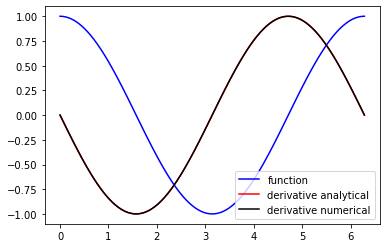

In [ ]:
plt.plot(x, y, color = 'b', label = 'function')
plt.plot(x, deriv_analytical, color = 'r', label = 'derivative analytical')
plt.plot(x, deriv_numerical, color = 'k', label = 'derivative numerical')
plt.legend()

In [ ]:
print(f'Mean absolute error is {np.mean(np.abs(deriv_analytical - deriv_numerical))}')

Mean absolute error is 0.00010365874208516022


In [ ]:
def compare_with_analytical(delta, method):
  deriv_approx = scheme(function = func, point = x, delta = np.pi*delta, dim = 0, method = method)
  return np.mean(np.abs(deriv_analytical - deriv_approx))

central_derivs = []; forward_derivs = []
for delta_frac in np.logspace(-5, -1, 1000):
  central_derivs.append([delta_frac, compare_with_analytical(delta_frac, 'central')])
  forward_derivs.append([delta_frac, compare_with_analytical(delta_frac, 'forward')])

In [ ]:
central_derivs_a = np.array(central_derivs)
forward_derivs_a = np.array(forward_derivs)
central_derivs_a.shape

(1000, 2)

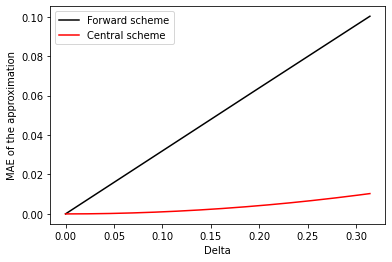

In [ ]:
plt.plot(forward_derivs_a[:, 0]*np.pi, forward_derivs_a[:, 1], color = 'k', label = 'Forward scheme')
plt.plot(central_derivs_a[:, 0]*np.pi, central_derivs_a[:, 1], color = 'r', label = 'Central scheme')
plt.xlabel('Delta')
plt.ylabel('MAE of the approximation')
plt.legend()

In [ ]:
def numerical_grad_desc_optimize(func, initial_position = None, step_coeff = 1e-3, scheme = 'central', delta = 1e-4, stop_cond = None):
  hist = [initial_position,]
  grad_hist = []
  pos = initial_position
  stop_cond_satisfied = False
  def default_stop_cond(pos_new, pos_prev):
    return np.linalg.norm(np.abs(pos_new - pos_prev)) < 1e-6

  if stop_cond is None:
    stop_cond = default_stop_cond

  while not stop_cond_satisfied:
    grad_vector = np.array([finite_difference_deriv(func, point = pos, delta = delta, dim = dim) 
                            for dim in range(len(initial_position))])
    pos_prev = np.copy(pos)
    pos = pos - step_coeff * grad_vector

    grad_hist.append(grad_vector)    
    hist.append(pos)
    stop_cond_satisfied = stop_cond(pos, pos_prev)

  return pos, np.array(hist), np.array(grad_hist)

In [ ]:
def func(x):
  return (1-x[0])**2 + 100 * (x[1] - x[0]**2)**2

In [ ]:
x1 = np.linspace(-1, 2, 1000); x2 = np.linspace(-1, 2, 1000)
grids = np.meshgrid(x1, x2, indexing = 'ij') # np.stack()

In [ ]:
func_v = np.vectorize(func)
res = np.empty_like(grids[0])
for idx, _ in np.ndenumerate(grids[0]):
  res[idx] = func((grids[0][idx], grids[1][idx]))
res.shape

(1000, 1000)

In [ ]:
def Heatmap(matrix, path = None, interval = None, use_norm = False, area = ((0, 1), (0, 1)), xlabel = '', ylabel = '', figsize=(8,6), title = ''):
    y, x = np.meshgrid(np.linspace(area[0][0], area[0][1], matrix.shape[0]), np.linspace(area[1][0], area[1][1], matrix.shape[1]))
    fig, ax = plt.subplots(figsize = figsize)
    plt.xlabel(xlabel)
    ax.set(ylabel=ylabel)
    ax.xaxis.labelpad = -10


    if interval:
        c = ax.pcolormesh(x, y, np.transpose(matrix), cmap='RdBu', vmin=interval[0], vmax=interval[1])    
    else:
      if use_norm:
        norm=norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,
                                                  vmin=-1.0, vmax=1.0, base=10)      
        c = ax.pcolormesh(x, y, np.transpose(matrix), cmap='RdBu', vmin=min(-abs(np.max(matrix)), -abs(np.min(matrix))),
                          vmax=max(abs(np.max(matrix)), abs(np.min(matrix))), norm = norm) 
      else:
        c = ax.pcolormesh(x, y, np.transpose(matrix), cmap='RdBu', vmin=min(-abs(np.max(matrix)), -abs(np.min(matrix))),
                          vmax=max(abs(np.max(matrix)), abs(np.min(matrix)))) 

    # set the limits of the plot to the limits of the data
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    if path is not None:
      plt.plot(path[:, 0], path[:, 1], color = 'k')
    fig.colorbar(c, ax=ax)
    plt.title(title)
    plt.show()

In [ ]:
point, hist, grad_hist = numerical_grad_desc_optimize(func, initial_position = [0., 0.])


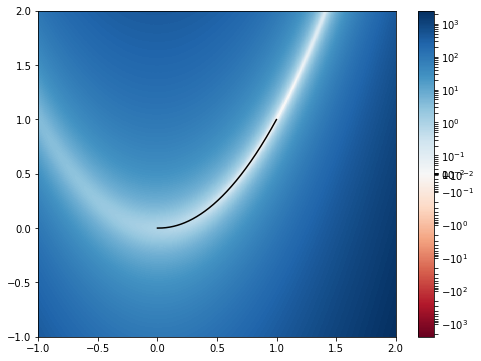

In [ ]:
Heatmap(res.T, path = hist, area = ((-1, 2), (-1, 2)))

In [ ]:
point, hist, grad_hist = numerical_grad_desc_optimize(func, initial_position = [-1.5, -0.75])

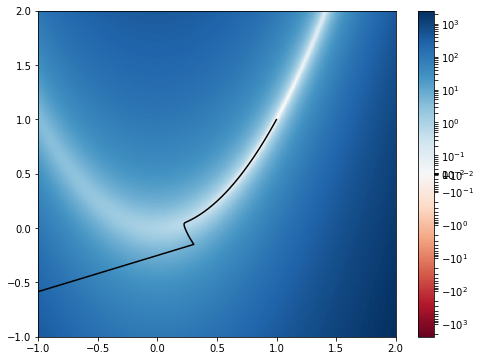

In [ ]:
Heatmap(res.T, path = hist, area = ((-1, 2), (-1, 2)))

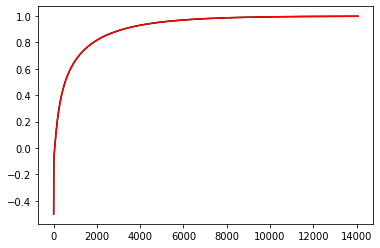

In [ ]:
plt.plot(hist[:, 0], color = 'k')
plt.plot(hist[:, 0], color = 'r')

In [ ]:
point, hist, grad_hist = numerical_grad_desc_optimize(func, initial_position = [-3.5, -3.75])

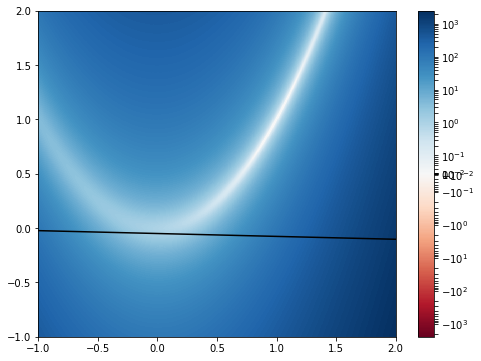

In [ ]:
Heatmap(res.T, path = hist, area = ((-1, 2), (-1, 2)))

In [ ]:
point, hist, grad_hist = numerical_grad_desc_optimize(func, initial_position = [-3.5, -3.75], step_coeff = 1e-6)

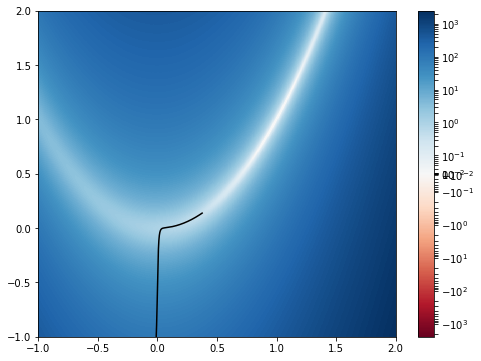

In [ ]:
Heatmap(res.T, path = hist, area = ((-1, 2), (-1, 2)))

Рассмотрим пример более вычислительно-сложной функции с заданным аналитически градиентом: 

\begin{equation}

f(x, y) = -(нб )

\end{equation}

In [ ]:
def function(x):
    return -(x[1]+47)*np.sin(np.sqrt(np.abs(x[0]/2+(x[1]+47))))-x[0]*np.sin(np.sqrt(np.abs(x[0]-(x[1]+47))))

def gradient(x):
    a1=np.abs(47-x[0]+x[1])
    s1=np.sign(47-x[0]+x[1])
    a2=np.abs(x[0]/2+(x[1]+47))
    s2=np.sign(x[0]/2+(x[1]+47))
    t1=(x[0]/2)*np.cos(np.sqrt(a1))/np.sqrt(a1)
    t2=(47+x[1])/4*np.cos(np.sqrt(a2))/np.sqrt(a2)
    t3=np.sin(np.sqrt(a1))
    t4=np.sin(np.sqrt(a2))
    dfx=s1*t1-s2*t2-t3
    dfy=-s1*t1-2*s2*t2-t4
    return np.array([dfx, dfy])    

In [ ]:
def numerical_grad_desc_optimize(func, grad_analytical = None, initial_position = None, step_coeff = 1e-3, scheme = 'central', delta = 1e-4, stop_cond = None):
  hist = [initial_position,]
  grad_hist = []
  pos = initial_position
  stop_cond_satisfied = False
  def default_stop_cond(val_new, val_prev):
    return np.linalg.norm(np.abs(val_new - val_prev)) < 1e-6

  if stop_cond is None:
    stop_cond = default_stop_cond

  while not stop_cond_satisfied:
    if grad_analytical is None:
      grad_vector = np.array([finite_difference_deriv(func, point = pos, delta = delta, dim = dim) 
                              for dim in range(len(initial_position))])
    else:
      grad_vector = grad_analytical(pos)
    pos_prev = np.copy(pos)
    pos = pos - step_coeff * grad_vector

    grad_hist.append(grad_vector)    
    hist.append(pos)
    stop_cond_satisfied = stop_cond(func(pos), func(pos_prev))

  return pos, np.array(hist), np.array(grad_hist)

In [ ]:
x = np.arange(0,512,0.3)
y = np.arange(0,512,0.3)
XX , YY = np.meshgrid(x,y)

res = np.empty_like(XX)
for idx, _ in np.ndenumerate(XX):
  res[idx] = function((XX[idx], YY[idx]))

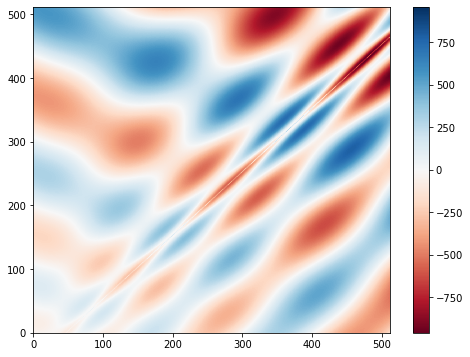

In [ ]:
Heatmap(res, area = ((0,512), (0,512)))

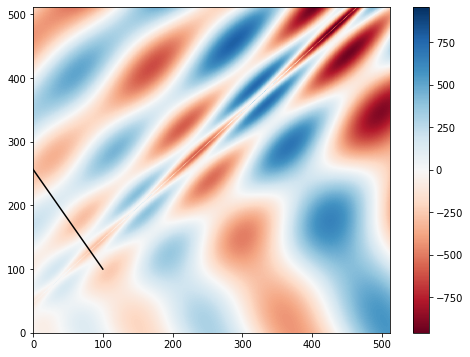

In [ ]:
point, hist, grad_hist = numerical_grad_desc_optimize(function, initial_position = [100, 100], step_coeff = 1e-2)
Heatmap(res.T, path = hist, area = ((0,512), (0,512)))

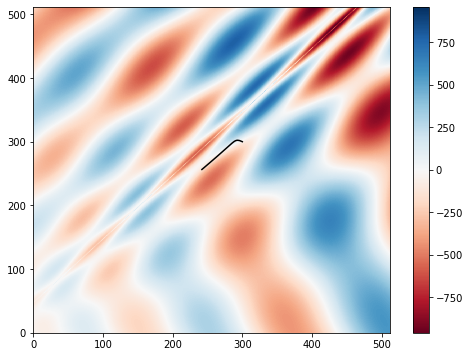

In [ ]:
point, hist, grad_hist = numerical_grad_desc_optimize(function, grad_analytical = gradient, initial_position = [300, 300], step_coeff = 1e-1)
Heatmap(res.T, path = hist, area = ((0,512), (0,512)))

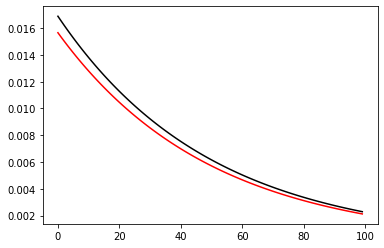

In [ ]:
plt.plot(grad_hist[-100:, 0], color = 'k')
plt.plot(grad_hist[-100:, 1], color = 'r')

In [ ]:
import copy
from numba import jit
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

In [ ]:
def function(w,x_dat,n):
    fn=np.array([])
    for x in x_dat:
     fn=np.append(fn,np.sum(np.array([w[2*i]*np.exp(-w[2*i+1]*x) for i in range(n)])))
    return fn

def grad(w,x,y,n):
    fn=np.array([w[2*i]*np.exp(-w[2*i+1]*x) for i in range(n)])
    return (np.sum(fn)-y)*np.array([[2*np.exp(-w[2*i+1]*x),-2*w[2*i]*x*np.exp(-w[2*i+1]*x)] for i in range(n)]).reshape(-1)

In [ ]:
def mini_batch_SGD(function,grad,lr,eps,n_term):
    n_it=0
    i=np.random.choice(len(data_x), 1)
    w_before=np.random.rand(2*number_exps)
    w_after=w_before-lr*grad(w_before,data_x[i],data_y[i],number_exps).reshape(-1)
    while np.linalg.norm(function(w_after,data_x,number_exps)-data_y)>eps:
        batch=np.random.choice(len(data_x), 100)
        w_before=copy.copy(w_after)
        for item in batch:
            w_after=w_before-lr*grad(w_before,data_x[item],data_y[item],number_exps).reshape(-1)
        n_it+=1
        if n_it>n_term: break
        if n_it % 1e2==0: print(n_it)
    return w_after

In [ ]:
data_x=np.linspace(0,np.pi,1000)
data_y=np.sin(np.linspace(0,np.pi,1000))

plt.plot(data_x,data_y)

lr=0.001
number_exps=24
eps=0.01
n_term=1e6

w_after=mini_batch_SGD(function,grad,lr,eps,n_term)
    # plt.plot(data_x,function(w_after,data_x,number_exps))
    
plt.figure()
plt.plot(data_x,data_y,'o')
plt.plot(data_x,function(w_after,data_x,number_exps))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850